In [21]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Monte-Carlo Simulation

Let $Y=1 \newline
\Rightarrow p(X|Y=1) = 2X \newline
\Rightarrow F(X)=X^2=u, \; u \in [0,1] \newline
\Rightarrow F^{-1}(u)=X = \sqrt{u}$
Let $Y=0 \newline
\Rightarrow p(X|Y=0) = 2 - 2X \newline
\Rightarrow F(X)=2X-X^2=u, \; u \in [0,1] \newline
\Rightarrow F^{-1}(u)=X = 1 - \sqrt{1 - u}$

Text(0.5, 1.0, 'Shape of Distributions')

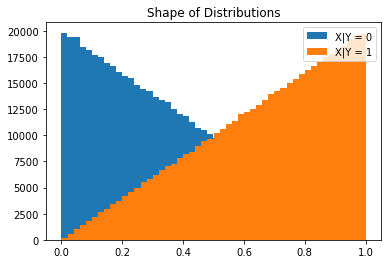

In [33]:
def create_data(N):
    y = np.array(np.random.choice([0, 1], size=N))
    x = np.array(np.random.random(N))
    for i in range(0,N):
        if y[i] == 1:
            x[i] = np.sqrt(x[i])
        else:
             x[i] = 1 - np.sqrt(1 - x[i])
    result = np.concatenate((x, y), axis=0)
    return(result)

a_y0=[]
a_y1=[]
a = create_data(1000000)

for i in range(0,1000000):
        if a[i+1000000] == 1:
            a_y1.append(a[i])
        else: 
            a_y0.append(a[i])


plt.hist(a_y0, label="X|Y = 0", bins=50)
plt.hist(a_y1, label="X|Y = 1", bins=50)
plt.legend(loc="upper right")
plt.title("Shape of Distributions")

## 1.2 Classification by Thresholding

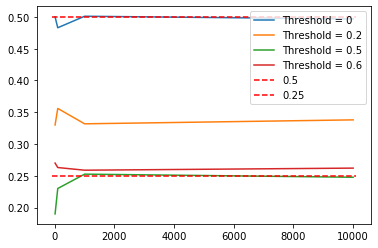

In [23]:
sum_error = []
mean_error = []
std_error = []
count = 0
std = []
for i in [0, 0.2, 0.5, 0.6]:
    for N in [10,100,1000,10000]:
        while(count < 10):
            count+=1
            data = create_data(N)
            X = data[0:N]
            Y = data[N:]
            pred = np.array(X >= i, dtype=int)
            error = np.array(pred != Y, dtype=int)
            sum_error.append(sum(error)/N)
            std.append(np.std(error))
        mean_error.append(sum(sum_error)/10)
        sum_error = []
        count = 0
        std_error.append(sum(std)/10)
    plt.plot([10,100,1000,10000], mean_error, label = f"Threshold = {i}")
    mean_error = []
plt.plot([-100, 10100], [0.5, 0.5], "r--", label = "0.5")
plt.plot([-100, 10100], [0.25, 0.25],  "r--", label = "0.25")
plt.legend(loc="upper right")

### Standard Deviation: Error

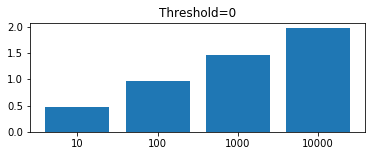

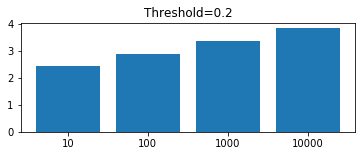

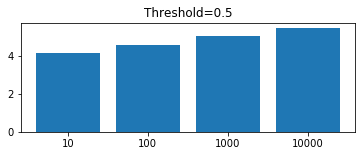

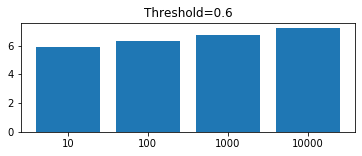

In [24]:
j=1
for i in [0, 0.2, 0.5, 0.6]:
    b=4*j
    plt.figure(figsize=(6, 2))
    plt.bar(["10", "100", "1000", "10000"], std_error[b-4:b])
    plt.title(f"Threshold={i}")
    j=j+1
std_error
plt.show()

## 1.3 Baseline Classifiers

### Rule C

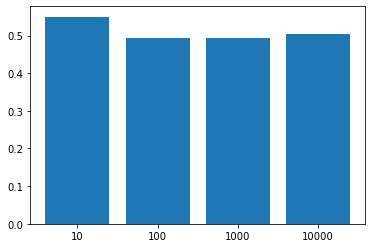

In [25]:
sum_error = []
mean_error = []
count = 0
for N in [10,100,1000,10000]:
    while(count < 10):
        count+=1
        data = create_data(N)
        X = data[0:N]
        Y = data[N:]
        C = np.array(np.random.choice([0, 1], size=N))
        error = np.array(np.not_equal(C, Y), dtype=int)
        sum_error.append(sum(error)/N)
    mean_error.append(sum(sum_error)/10)
    sum_error = []
    count = 0
plt.bar(["10", "100", "1000", "10000"], mean_error)
mean_error=[]

### Rule D

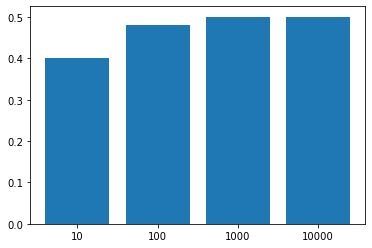

In [26]:
# Rule D
sum_error = []
mean_error = []
count = 0
for N in [10,100,1000,10000]:
    while(count < 10):
        count+=1
        data = create_data(N)
        X = data[0:N]
        Y = data[N:]
        D = np.ones(N)
        error = np.array(np.not_equal(D, Y), dtype=int)
        sum_error.append(sum(error)/N)
    mean_error.append(sum(sum_error)/10)
    sum_error = []
    count = 0
plt.bar(["10", "100", "1000", "10000"], mean_error)
mean_error=[]

## 1.4 Nearest Neighbor Classification

In [27]:
def toy_nearest_neighbor(Xtest, Xtrain, Ytrain):
    classifications = []
    for X in Xtest:
        dist = np.abs(Xtrain - X)
        ind = np.where(dist == np.amin(dist))
        Y = Ytrain[ind].tolist()[0]
        classifications.append(Y)
    return classifications

def create_data_2(N):
    if N < 2:
        return "Not usefull"
    result = create_data(N)
    if np.amax(result[N:]) != 1:
        result[N-1]= np.sqrt(np.random.random(1))
        result[-1] = 1
    if np.amin(result[N:]) == 1:
        result[N-1]= 1 - np.sqrt(1 - np.random.random(1))
        result[-1] = 0
    return result

#Testrun:
label_1=[]
label_2=[]
for i in range(10):
    label_2.append(sum(create_data_2(2)[2:]))
for i in range(10):
    label_1.append(sum(create_data(2)[2:]))
print(f"Label-Summen: Alte Funktion - {label_1} \nLabel-Summen: Neue Funktion - {label_2}")

Label-Summen: Alte Funktion - [2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 2.0] 
Label-Summen: Neue Funktion - [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### Small Training Set, one try only.

In [28]:
n=2
ntest = 5000
Traindata = create_data_2(n)
Xtest = create_data_2(ntest)
classification = toy_nearest_neighbor(Xtest[:ntest], Traindata[:n], Traindata[n:])
error = sum(np.array(np.not_equal(classification, Xtest[ntest:]), dtype=int))/ntest

print(error)

0.2572


### Small Training Set, 100 tries.

In [29]:
sum_error =[]
for i in range(100):
    n=2
    ntest = 500
    Traindata = create_data_2(n)
    Xtest = create_data_2(ntest)
    classification = toy_nearest_neighbor(Xtest[:ntest], Traindata[:n], Traindata[n:])
    error = sum(np.array(np.not_equal(classification, Xtest[ntest:]), dtype=int))/ntest
    sum_error.append(error)
print(sum(sum_error)/100)

0.35068


### Large Training Set, 100 tries.

In [30]:
sum_error =[]
for i in range(100):
    n=100
    ntest = 500
    Traindata = create_data_2(n)
    Xtest = create_data_2(ntest)
    classification = toy_nearest_neighbor(Xtest[:ntest], Traindata[:n], Traindata[n:])
    error = sum(np.array(np.not_equal(classification, Xtest[ntest:]), dtype=int))/ntest
    sum_error.append(error)
print(sum(sum_error)/100)

0.33682
